In [16]:
%run spot_functions.ipynb
%run gl_functions.ipynb

In [2]:
sdk, robot, id_client, \
robot_state_client, command_client, \
image_client, graph_nav_client, \
world_object_client, manipulation_api_client = initRobot('192.168.50.3')
timeout_sec = 10

In [3]:
lease_client, lease, lease_keep_alive = getLease(robot)

In [4]:
# Initialize Groundlight API

GROUNDLIGHT_API_TOKEN = 'api_2Au8NPiTMbSLQ73Vjr2eMhX2qUh_pt4EEKhtDNgnjN3dUAr89YANDcYsmBkJZV'
gl = Groundlight(api_token=GROUNDLIGHT_API_TOKEN)
detectors = gl.list_detectors()
det = detectors.results[0]

In [15]:
det

Detector(id='det_2BB9A8AHTcE0lgzRgZUXAbIIXoC', type=<DetectorTypeEnum.detector: 'detector'>, created_at=datetime.datetime(2022, 6, 27, 15, 21, 4, 547195, tzinfo=tzoffset(None, -25200)), name='canLocalizer', query='Is an aluminum can entirely in the image?', group_name='__DEFAULT', confidence_threshold=0.65)

In [20]:
getBattInfo()

Battery at: 17.0 %. Robot has 985 seconds left


(17.0, 985)

In [9]:
success = powerOn(robot)

True


In [19]:
bdcrc.blocking_selfright(command_client, timeout_sec = timeout_sec)

cmd = RobotCommandBuilder.claw_gripper_open_fraction_command(1.0)
cmd_id = command_client.robot_command(cmd, end_time_secs = time.time()+timeout_sec)

In [11]:
bdcrc.blocking_stand(command_client, timeout_sec = timeout_sec)

In [12]:
moveRobotRelative(command_client, 0, 0, 0)

In [36]:
# for k in range(4):
#     print('LOOP NUM:', k)
#     for j in range(4):
#         print('    ITEM num:', j)
#         for i in range(3):
#             print('        image num:', i)
#             moveTo, lookAt = randomGazeDown()

#             moveToAndLookAt(command_client, moveTo, lookAt)

#             time.sleep(0.3)

#             handColorImg, image_response = capHandImage(image_client, 'hand_color_image')

#             image_query = matThruDet(det, handColorImg)        


#         cmd = RobotCommandBuilder.arm_stow_command()
#         cmd_id = command_client.robot_command(cmd, end_time_secs = time.time()+timeout_sec)
#         bdcrc.block_until_arm_arrives(command_client, cmd_id, timeout_sec = time.time() + 3.0)

#         time.sleep(0.3)

#         moveRobotRelative(command_client, 0, 0, np.pi/2)

LOOP NUM: 0
    ITEM num: 0
        image num: 0
        image num: 1
        image num: 2
    ITEM num: 1
        image num: 0
        image num: 1
        image num: 2
    ITEM num: 2
        image num: 0
        image num: 1
        image num: 2
    ITEM num: 3
        image num: 0
        image num: 1
        image num: 2
LOOP NUM: 1
    ITEM num: 0
        image num: 0
        image num: 1
        image num: 2
    ITEM num: 1
        image num: 0
        image num: 1
        image num: 2
    ITEM num: 2
        image num: 0
        image num: 1
        image num: 2
    ITEM num: 3
        image num: 0
        image num: 1
        image num: 2
LOOP NUM: 2
    ITEM num: 0
        image num: 0
        image num: 1
        image num: 2
    ITEM num: 1
        image num: 0
        image num: 1
        image num: 2
    ITEM num: 2
        image num: 0
        image num: 1
        image num: 2
    ITEM num: 3
        image num: 0
        image num: 1
        image num: 2
LOOP NUM: 3
    

LOOP NUM: 0
    ITEM num: 0
        image num: 0


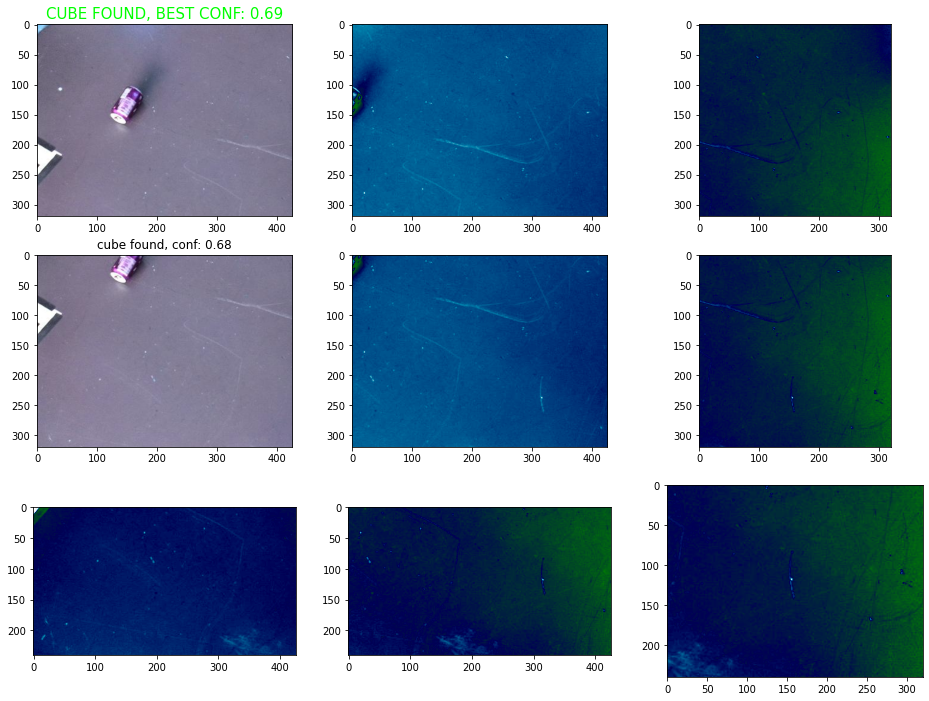

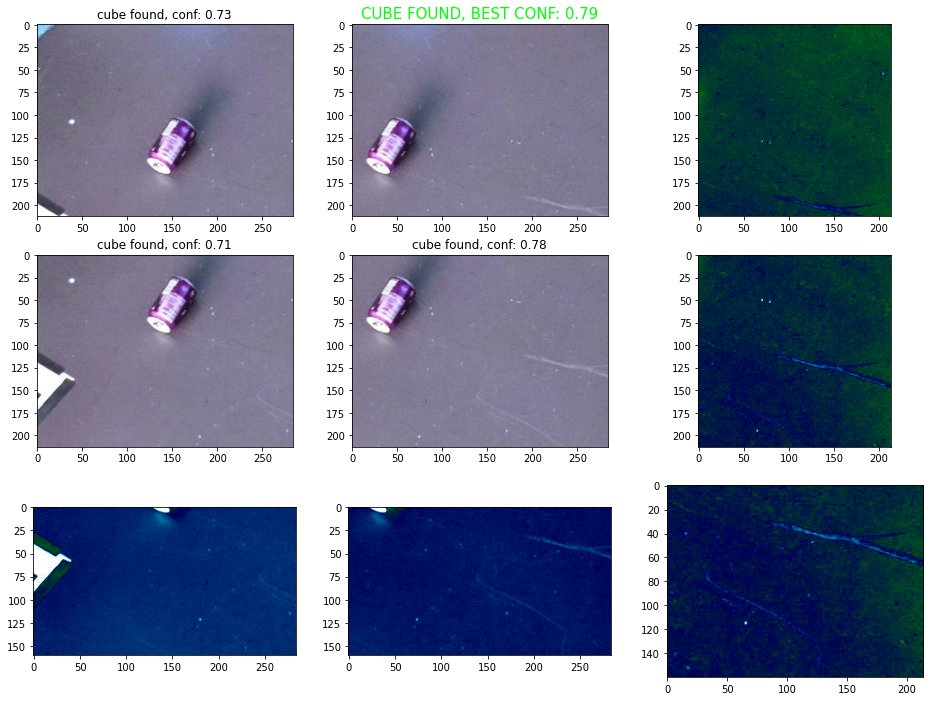

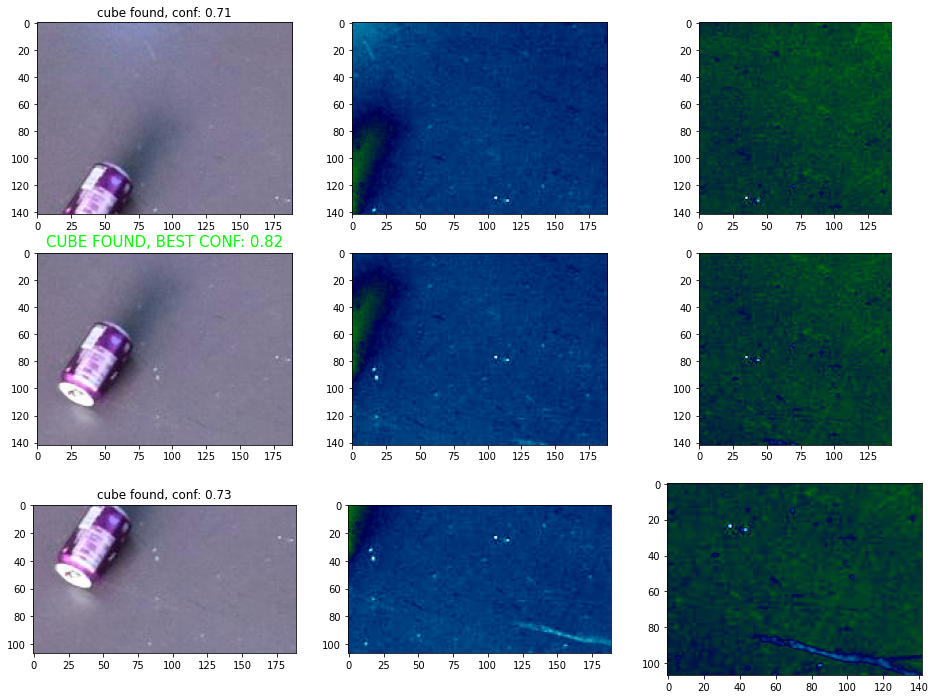

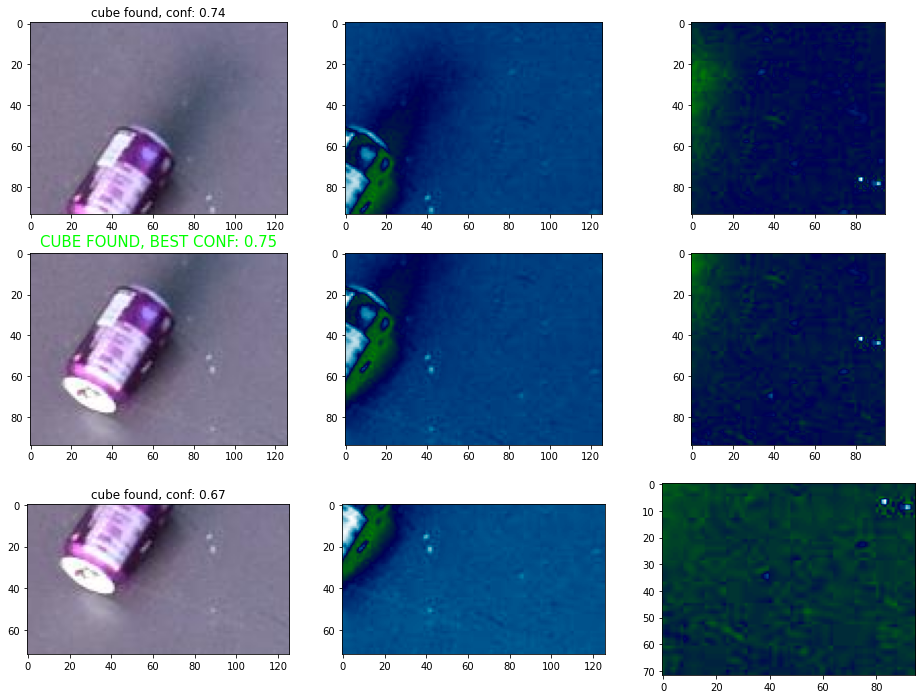

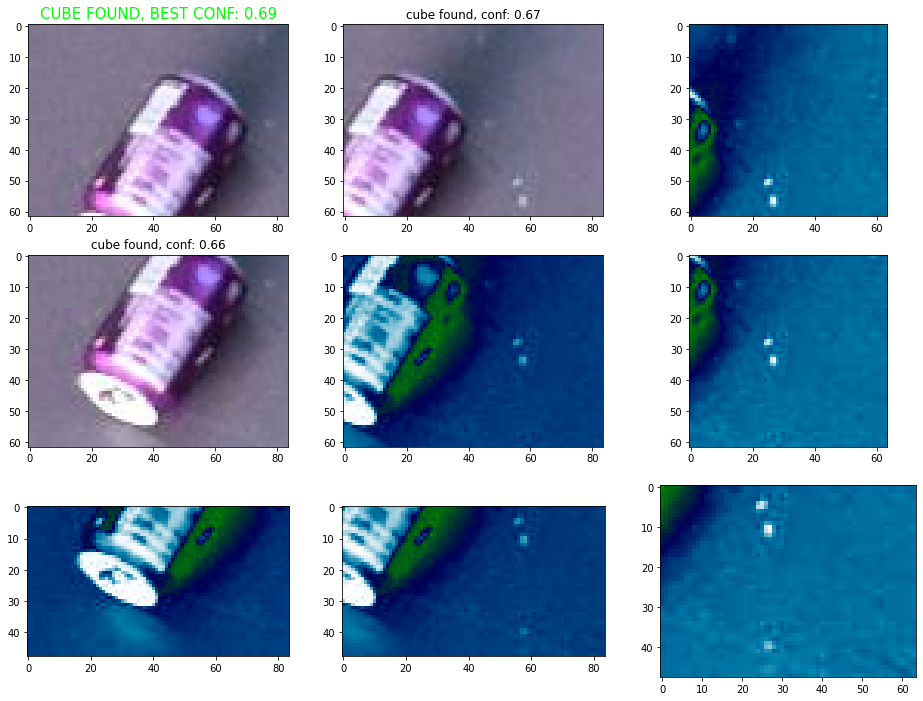

    ITEM num: 1
        image num: 0


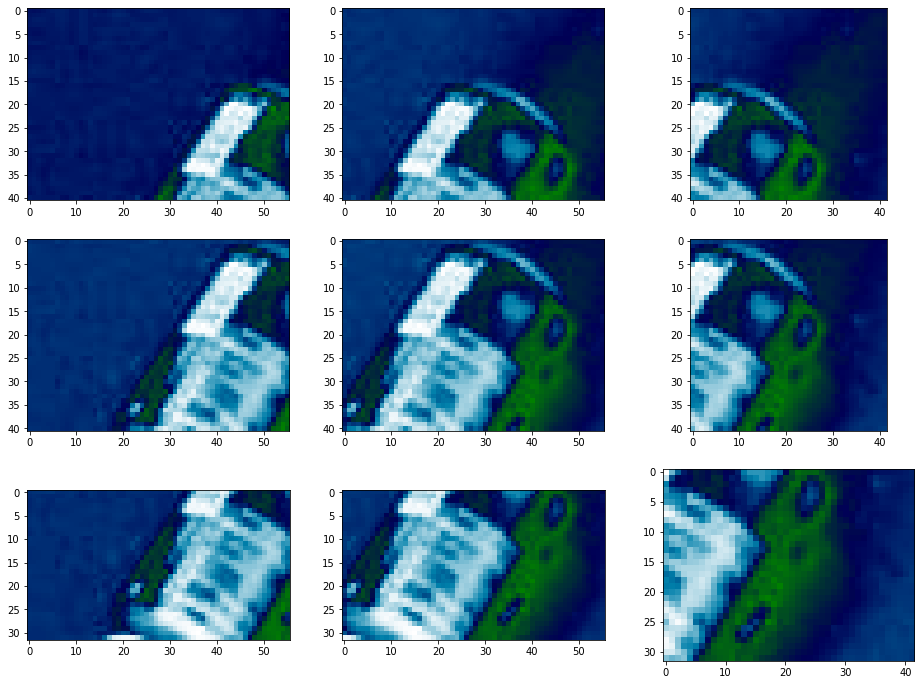

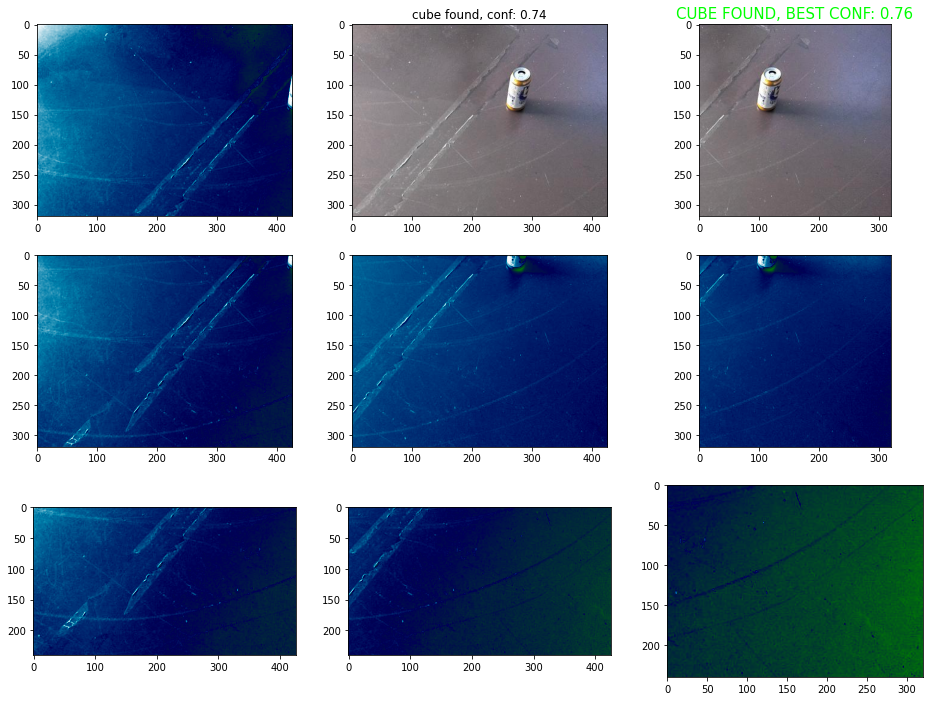

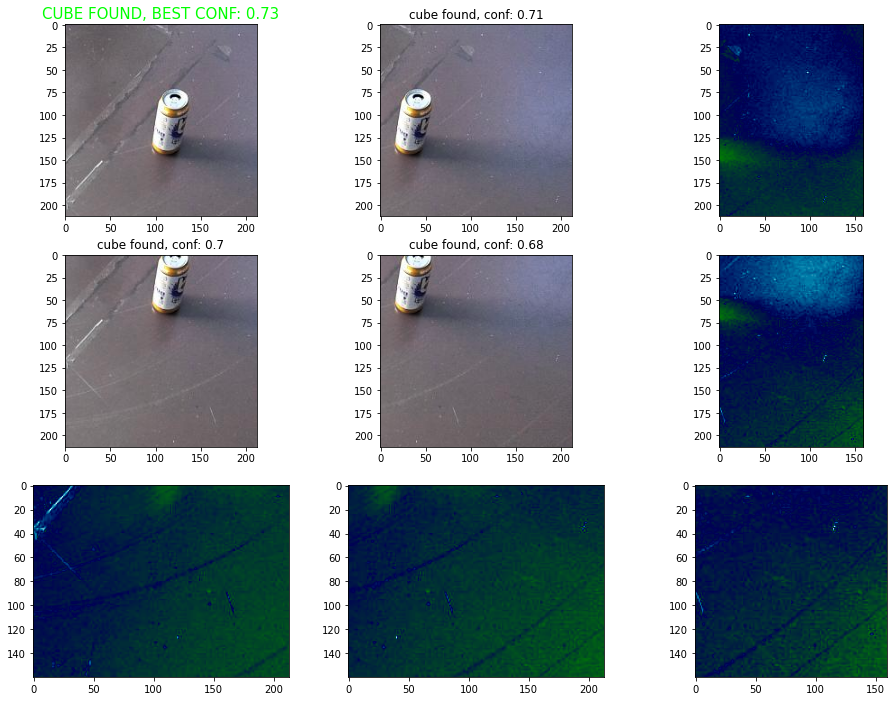

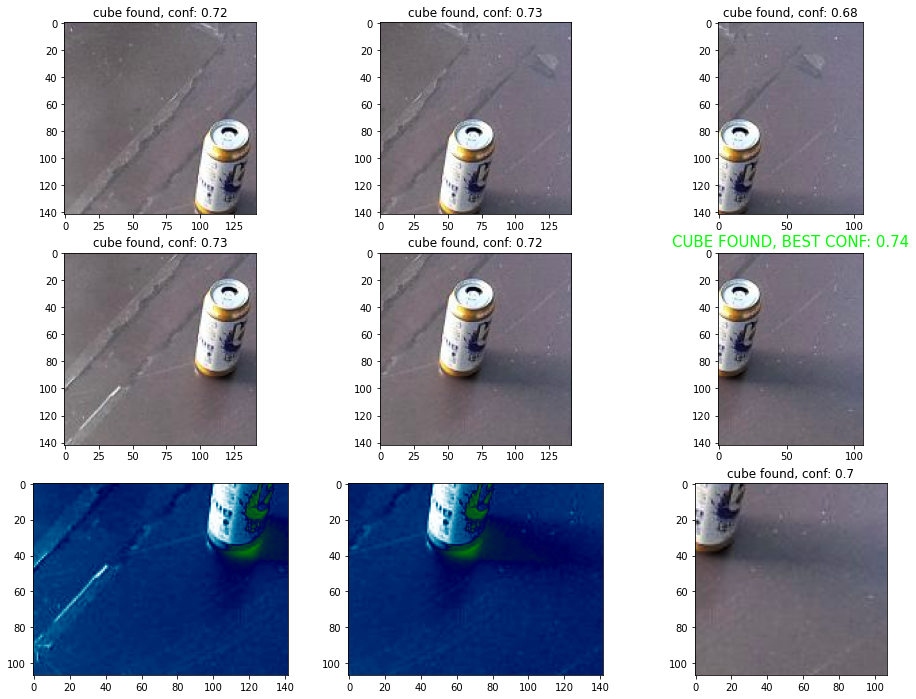

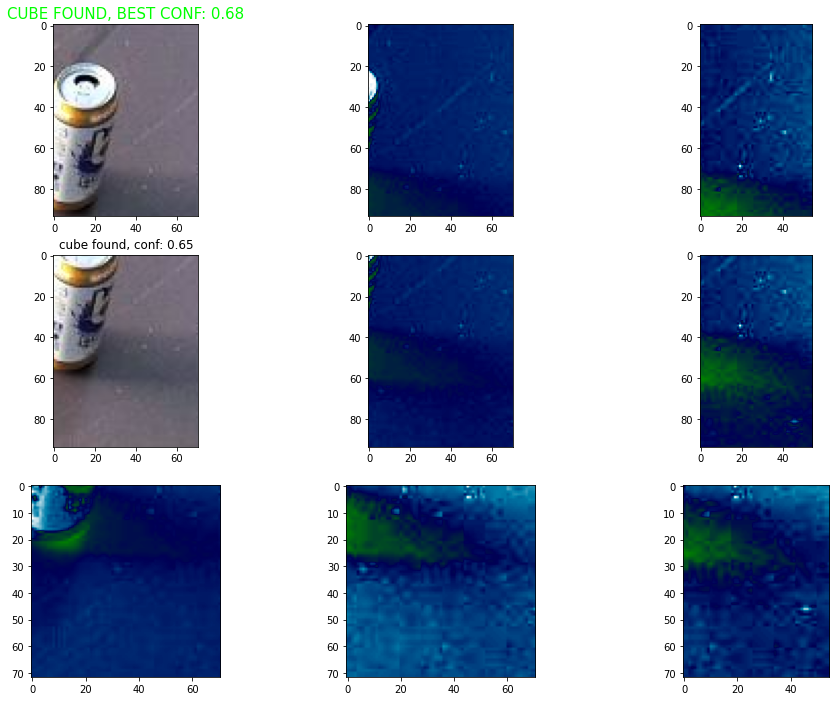

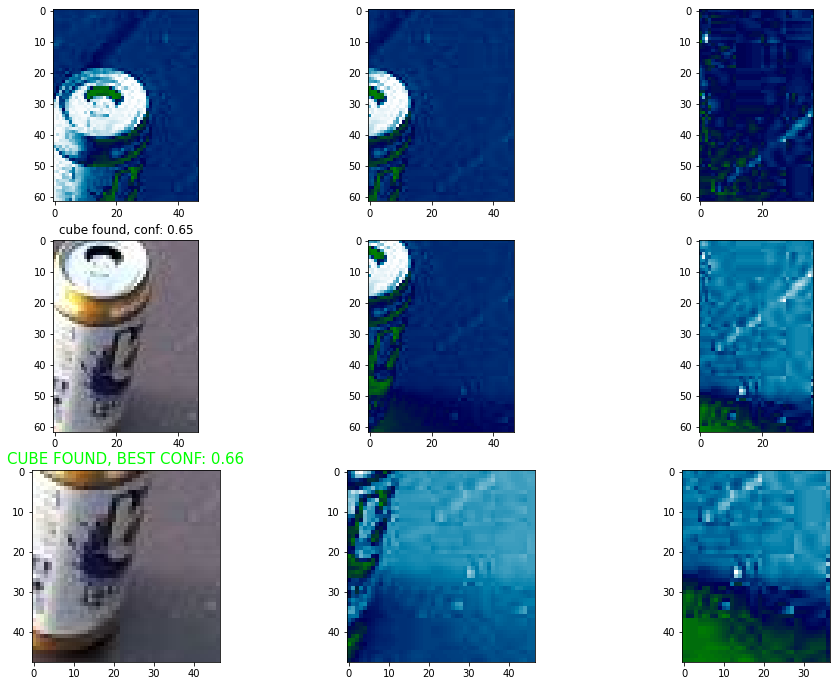

    ITEM num: 2
        image num: 0


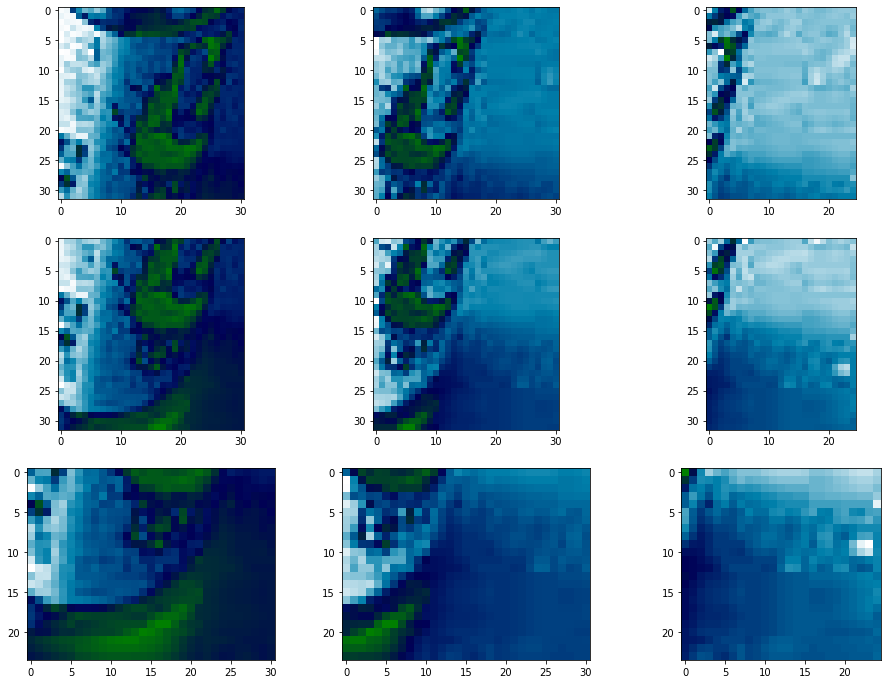

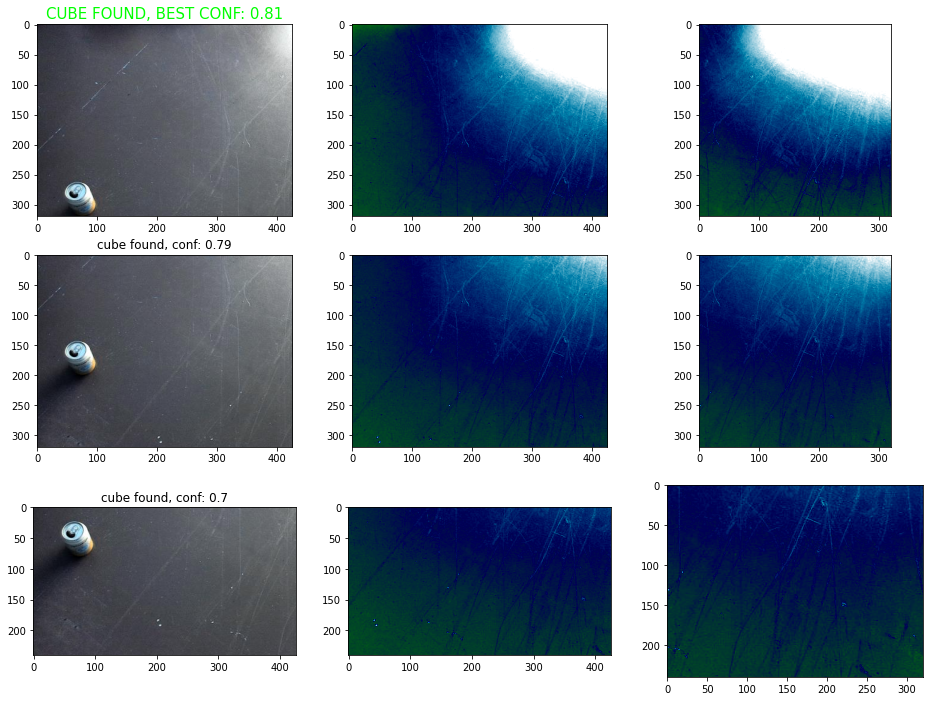

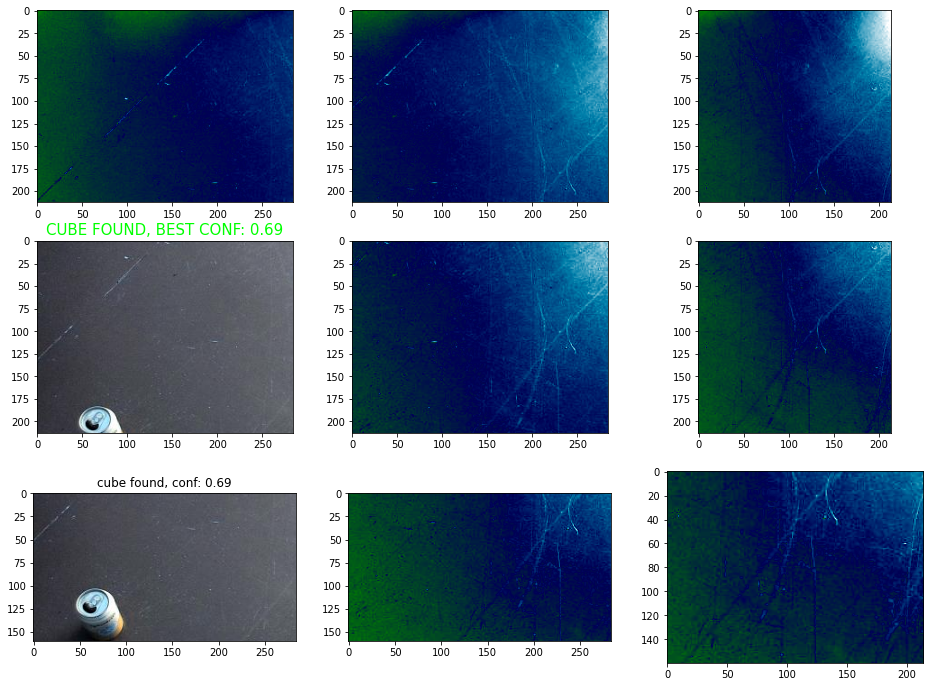

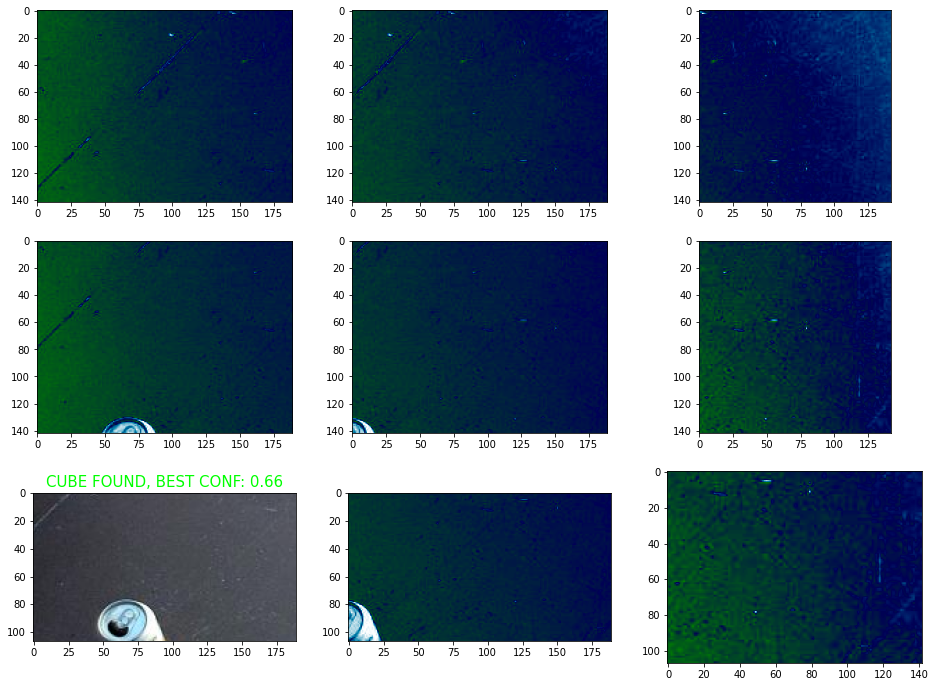

    ITEM num: 3
        image num: 0


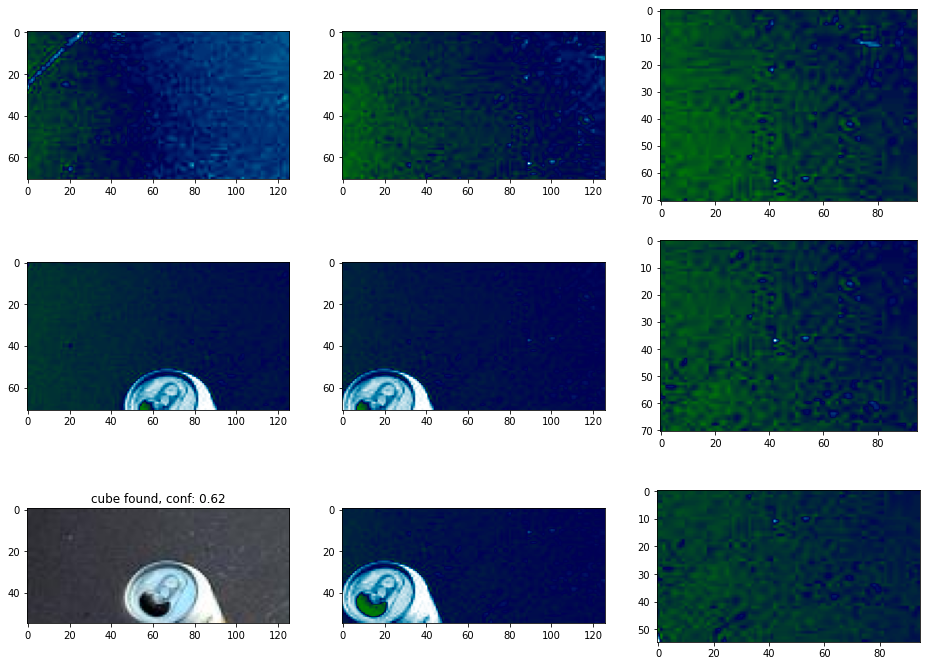

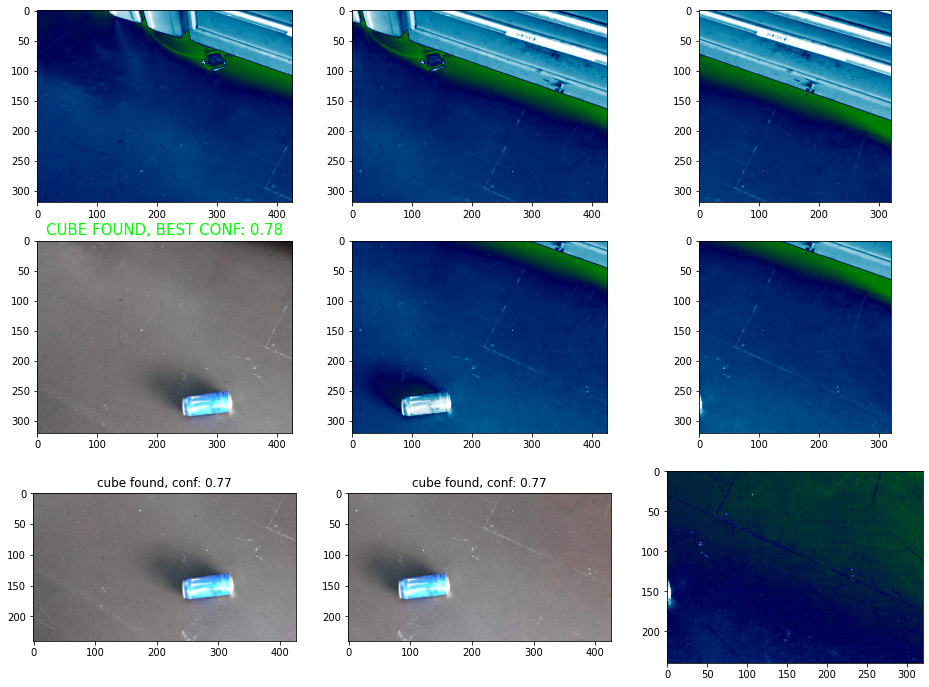

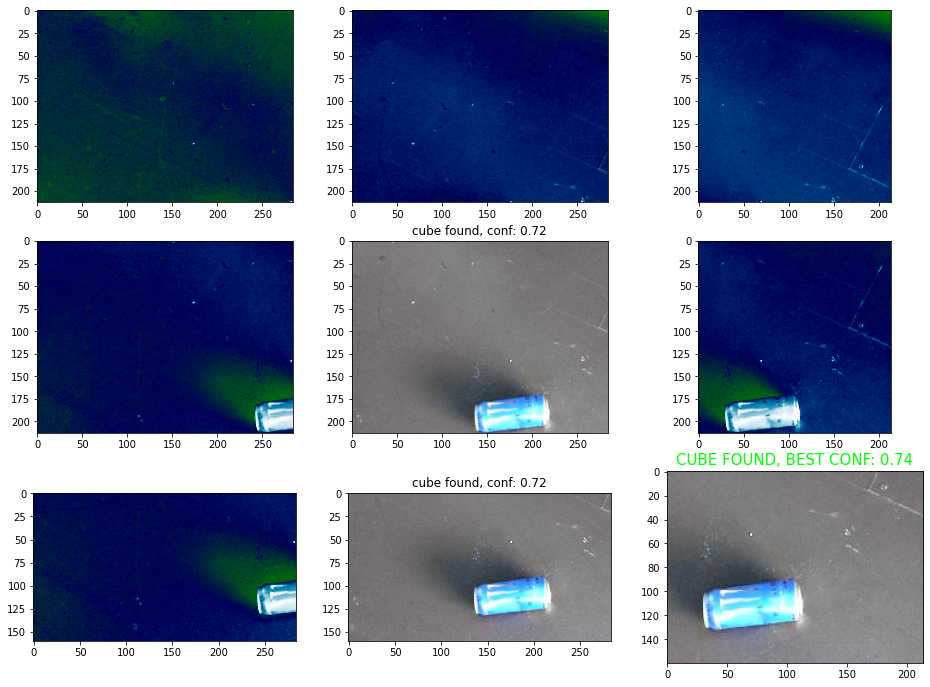

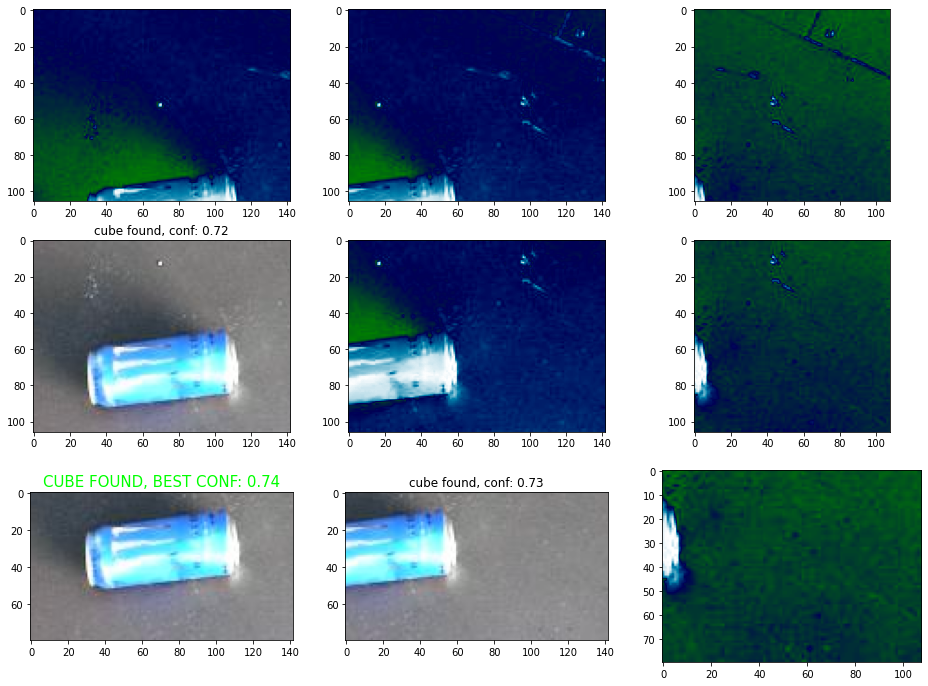

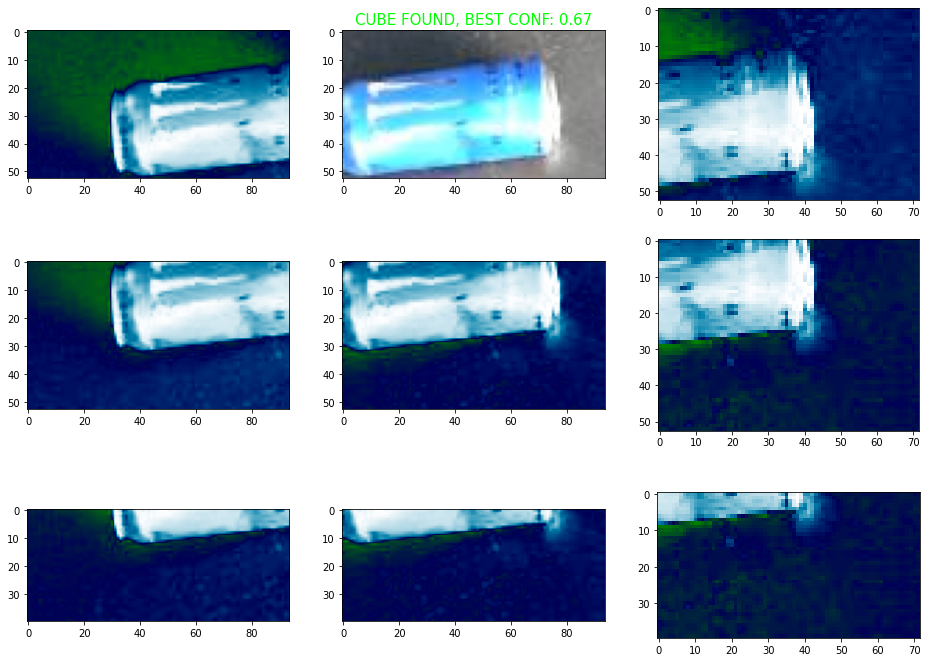

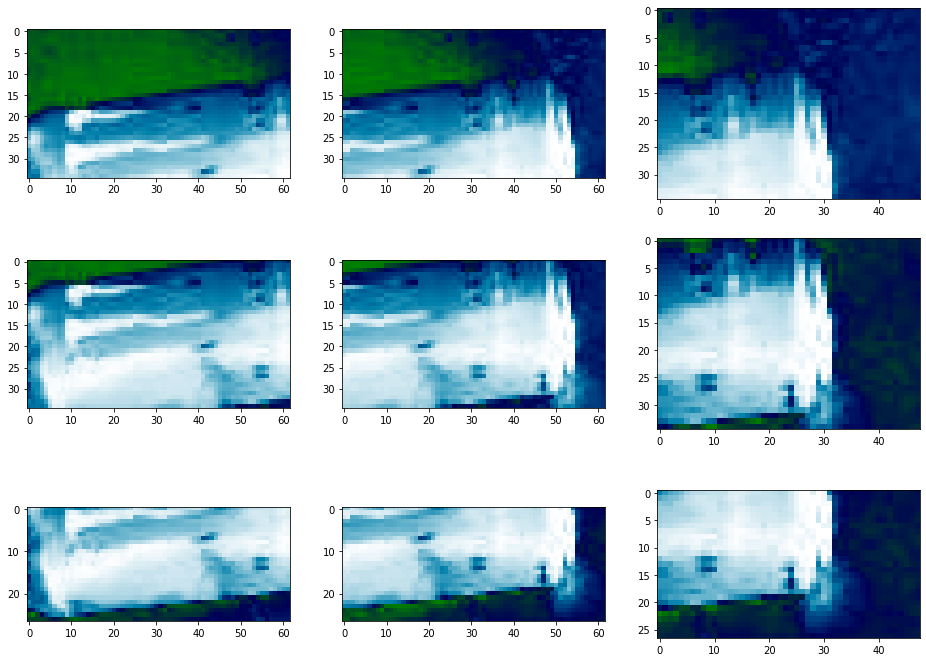

In [17]:
for k in range(1):
    print('LOOP NUM:', k)
    for j in range(4):
        print('    ITEM num:', j)
        for i in range(1):
            print('        image num:', i)
            moveTo, lookAt = randomGazeDown()

            moveToAndLookAt(command_client, moveTo, lookAt)

            time.sleep(0.3)

            handColorImg, image_response = capHandImage(image_client, 'hand_color_image')

            tree = sweepLocalize(det, handColorImg, True)


        cmd = RobotCommandBuilder.arm_stow_command()
        cmd_id = command_client.robot_command(cmd, end_time_secs = time.time()+timeout_sec)
        bdcrc.block_until_arm_arrives(command_client, cmd_id, timeout_sec = time.time() + 3.0)

        time.sleep(0.3)

        moveRobotRelative(command_client, 0, 0, np.pi/2)